# 機械学習帳 確認問題(11.6)

[機械学習帳の階層的クラスタリングの確認問題(11.6)](https://chokkan.github.io/mlnote/unsupervised/02hac.html#id19)を解きます。

## 講義内容の復習

![chapter11-1.svg](./images/chapter11/chapter11-1.svg)

![chapter11-2.svg](./images/chapter11/chapter11-2.svg)

## 0. データセットの読み込み

[教育用標準データセット（SSDSE）](https://www.nstac.go.jp/use/literacy/ssdse/)に収録されている都道府県庁所在市別・家計消費データ（SSDSE-C）を読み込む。


In [1]:
URL = "https://www.nstac.go.jp/sys/files//SSDSE-C-2022.csv"
import urllib
from pathlib import Path


csv = urllib.request.urlopen(URL).read().decode("shift-jis")
csv_path = Path("./data/ssdse-c-2022.csv")
with csv_path.open(mode="w", encoding="utf-8") as f:
    f.write(csv)

## 1. 階層クラスタリングの実施

教育用標準データセット（SSDSE）に収録されている都道府県庁所在市別・家計消費データ（SSDSE-C）に対してクラスタ分析を適用し、消費行動が類似している都道府県のクラスタを作りたい。最短距離法、最長距離法、Ward法を用いて都道府県をクラスタリングし、デンドログラムをそれぞれ描画せよ。ただし、クラスタの各要素がどの都道府県であるか分かるようにせよ。

はじめに、データを読み込む。

In [2]:
import pandas as pd


raw_df = pd.read_csv(csv_path)

余分な行を削除する。

In [3]:
code_name = raw_df.iloc[0,:]  # コードの名称記載行を取得
df = raw_df.drop(0, axis=0) # 不要な行の削除
location_name = df.iloc[:,:3]  # 県庁所在地名を取得
location_name.set_index("SSDSE-C-2022", inplace=True)
df = df.drop(["Prefecture", "City"], axis=1) # 不要な列の削除
df = df.set_index("SSDSE-C-2022")  # 県庁所在地のコードをindexにする
df = df.astype("float32")  # 数値型に変換

In [4]:
df.head(5)

,LA03,LB00,LB01,LB011001,LB012001,LB012002,LB013001,LB013002,LB013003,LB013004,...,LB121104,LB121105,LB121106,LB121107,LB121108,LB121109,LB121110,LB121201,LB121202,LB122001
SSDSE-C-2022,,,,,,,,,,,,,,,,,,,,,
R00000,2.95,960240.0,79678.0,22998.0,10163.0,21494.0,3513.0,2230.0,1312.0,4367.0,...,13620.0,19716.0,4179.0,9794.0,6184.0,5067.0,44164.0,6522.0,11358.0,9713.0
R01100,2.84,942332.0,82566.0,29665.0,9367.0,18496.0,3214.0,2113.0,1280.0,4360.0,...,16906.0,22845.0,3772.0,15761.0,7132.0,4187.0,20326.0,5462.0,14817.0,13273.0
R02201,2.87,892205.0,73320.0,21932.0,8285.0,17063.0,3164.0,2258.0,1196.0,5592.0,...,12594.0,13802.0,2748.0,6796.0,5794.0,3991.0,14162.0,2833.0,6874.0,9698.0
R03201,3.12,937554.0,79379.0,23297.0,8402.0,20278.0,3435.0,2199.0,1302.0,6223.0,...,11490.0,9847.0,1826.0,5333.0,4951.0,3884.0,35759.0,4046.0,11100.0,10647.0
R04100,3.00,972504.0,75346.0,20686.0,8875.0,20314.0,3128.0,2051.0,1343.0,4985.0,...,12384.0,16022.0,2890.0,7540.0,6073.0,4585.0,35037.0,5097.0,7996.0,9177.0


クラスタリングを実施する。[11.4. SciPyでの実装例](https://chokkan.github.io/mlnote/unsupervised/02hac.html#scipy)を参考に、次の手順でクラスタリングを行う。

1. 距離行列を求める: [scipy.spatial.distance.pdist](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html)
2. クラスタリングを行う: [scipy.cluster.hierarchy.linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html)
3. デンドログラムを描画する: [scipy.cluster.hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html)

これらを実行する関数を作成する。

In [5]:
import scipy
import scipy.cluster
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


def clustering(df, method, metric="euclidean"):
    _X = StandardScaler().fit_transform(df)
    distance_matrix = scipy.spatial.distance.pdist(_X, metric=metric)
    cluster = scipy.cluster.hierarchy.linkage(distance_matrix, method=method, metric=metric)

    figure, ax = plt.subplots(dpi=100)
    dn = scipy.cluster.hierarchy.dendrogram(cluster, labels=df.index, ax=ax)
    ax.set_ylabel("Distance")
    plt.show()
    return dn

## 1.1 最短距離法

最短距離法は`method=single`で指定する。

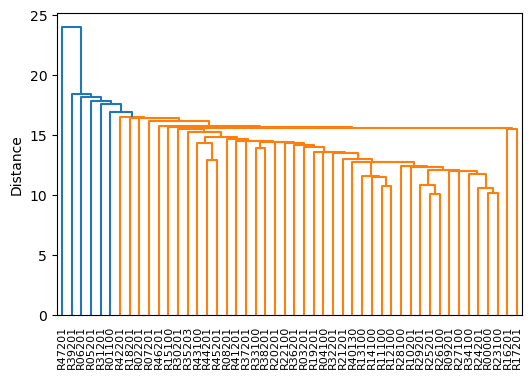

,R47201,R39201,R06201,R05201,R31201,R01100,R42201,R18201,R02201,R07201,...,R25201,R26100,R09201,R27100,R34100,R24201,R00000,R23100,R16201,R17201
0,那覇市,高知市,山形市,秋田市,鳥取市,札幌市,長崎市,福井市,青森市,福島市,...,大津市,京都市,宇都宮市,大阪市,広島市,津市,全国,名古屋市,富山市,金沢市


In [6]:
result = clustering(df, method="single")
pd.Series([location_name[location_name.index == idx].City[0] for idx in result["ivl"]], index=result["ivl"]).to_frame().T

クラスタが連鎖して繋がっていく様子が見られる。

## 1.2 最長距離法

最長距離法は`method=complete`で指定する。

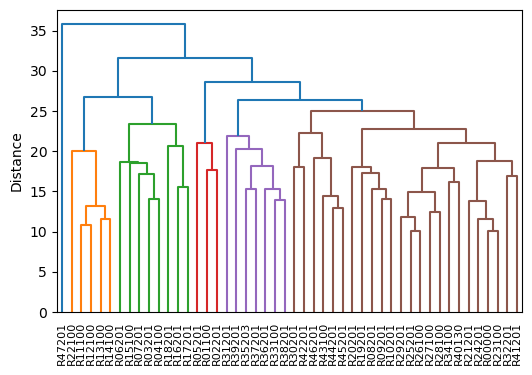

,R47201,R22100,R11100,R12100,R13100,R14100,R06201,R15100,R07201,R03201,...,R27100,R28100,R34100,R40130,R21201,R24201,R00000,R23100,R32201,R41201
0,那覇市,静岡市,さいたま市,千葉市,東京都区部,横浜市,山形市,新潟市,福島市,盛岡市,...,大阪市,神戸市,広島市,福岡市,岐阜市,津市,全国,名古屋市,松江市,佐賀市


In [7]:
result = clustering(df, method="complete")
pd.Series([location_name[location_name.index == idx].City[0] for idx in result["ivl"]], index=result["ivl"]).to_frame().T

最短距離法よりそれぞれのクラスタごとにまとまっている様子が見える。ただ、1つ1つのクラスタの大きさは小さい。

## 1.3 Ward法

最長距離法は`method=ward`で指定する。

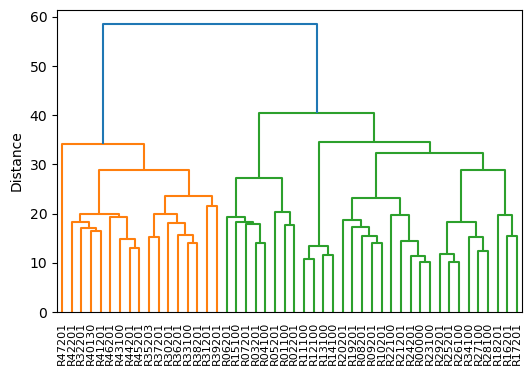

,R47201,R42201,R32201,R40130,R41201,R46201,R43100,R44201,R45201,R35203,...,R23100,R29201,R25201,R26100,R34100,R27100,R28100,R18201,R16201,R17201
0,那覇市,長崎市,松江市,福岡市,佐賀市,鹿児島市,熊本市,大分市,宮崎市,山口市,...,名古屋市,奈良市,大津市,京都市,広島市,大阪市,神戸市,福井市,富山市,金沢市


In [8]:
result = clustering(df, method="ward")
pd.Series([location_name[location_name.index == idx].City[0] for idx in result["ivl"]], index=result["ivl"]).to_frame().T

割合大きな塊が2つに分かれているのがわかる。